In [1]:
import classifier as clf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from itertools import cycle
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv('train_data.csv')
train

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [3]:
train = train.to_numpy()
R_train = train[:, 0:5]
L_train = train[:, 5]
R_train

array([[0.0, 0.0, 0.0, 0.0, 0.0],
       [0.08, 0.08, 0.1, 0.24, 0.9],
       [0.06, 0.06, 0.05, 0.25, 0.33],
       ...,
       [0.54, 0.82, 0.71, 0.29, 0.77],
       [0.5, 0.75, 0.81, 0.61, 0.26],
       [0.66, 0.9, 0.76, 0.87, 0.74]], dtype=object)

In [4]:
w0 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
w_history = clf.weight_train(w0, R_train, tol = 1e-3)
#w_history

In [5]:
classes = np.array(['very_low', 'Low', 'Middle', 'High'])
R_Lp = clf.center_find(R_train, L_train, classes)
R_Lp

array([[0.30579167, 0.198125  , 0.36625   , 0.35875   , 0.09083333],
       [0.32114458, 0.337     , 0.43072289, 0.4973494 , 0.23762651],
       [0.39997727, 0.36792045, 0.50681818, 0.34284091, 0.54238636],
       [0.42165079, 0.42319048, 0.50166667, 0.50126984, 0.77253968]])

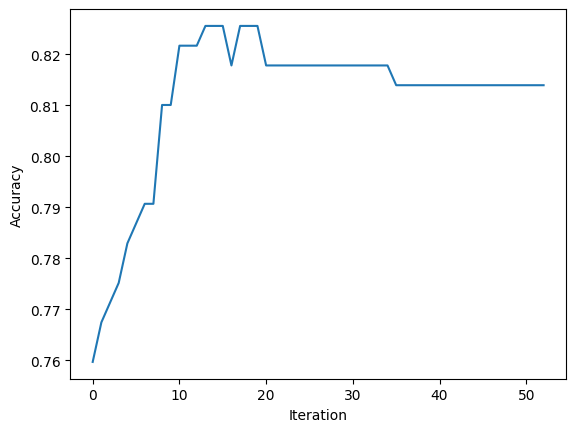

[8.10878012e-04 7.32727058e-03 1.31132859e-01 2.18678878e-02
 8.38861105e-01]


In [6]:
x = np.arange(w_history.shape[0])
y = np.zeros_like(x, dtype = 'float')
for i in range(x.shape[0]):
    y[i] = clf.accuracy(clf.labeling(R_train, R_Lp, classes, w_history[i],'eu'), L_train)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(x, y)
plt.show()
w = clf.early_stopping(w_history, L_train, R_train, R_Lp, classes,'eu')
print(w)

In [7]:
test = pd.read_csv('test_data.csv')
test

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High
141,0.85,0.82,0.66,0.83,0.83,High
142,0.56,0.60,0.77,0.13,0.32,Low
143,0.66,0.68,0.81,0.57,0.57,Middle


In [8]:
test = test.to_numpy()
R_test = test[:, 0:5].astype('float')
L_test = test[:, 5].astype('<U8')
#L_test

In [9]:
classes = np.array(['Very Low', 'Low', 'Middle', 'High'])
L_pred = clf.labeling(R_test, R_Lp, classes, w, 'eu')
#L_pred

In [10]:
clf.accuracy(L_pred, L_test)

0.8758620689655172

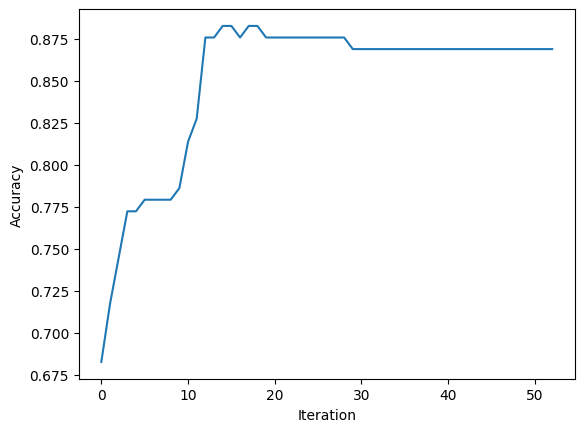

In [11]:
x1 = np.arange(w_history.shape[0])
y1 = np.zeros_like(x, dtype = 'float')
for i in range(x.shape[0]):
    y[i] = clf.accuracy(clf.labeling(R_test, R_Lp, classes, w_history[i],'eu'), L_test)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(x, y)
plt.show()

In [12]:
ACC = clf.acc(L_pred, L_test, classes)
SEN = clf.sen(L_pred, L_test, classes)
SPEC = clf.spec(L_pred, L_test, classes)
PRE = clf.pre(L_pred, L_test, classes)
F1 = clf.f1_score(L_pred, L_test, classes)
for i in range (classes.shape[0]):
    print ("Accuracy of",classes[i] + " is",ACC[i])
    print ("Sensitivity of",classes[i] + " is",SEN[i])
    print ("Specificity of",classes[i] + " is",SPEC[i])
    print ("Precision of",classes[i] + " is",PRE[i])
    print ("F1 score of",classes[i] + " is",F1[i])
    print("\n")

Accuracy of Very Low is 0.9724137931034482
Sensitivity of Very Low is 0.9230769230769231
Specificity of Very Low is 0.9831932773109243
Precision of Very Low is 0.9230769230769231
F1 score of Very Low is 0.9230769230769231


Accuracy of Low is 0.903448275862069
Sensitivity of Low is 0.9565217391304348
Specificity of Low is 0.8787878787878788
Precision of Low is 0.7857142857142857
F1 score of Low is 0.8627450980392157


Accuracy of Middle is 0.903448275862069
Sensitivity of Middle is 0.7058823529411765
Specificity of Middle is 0.963963963963964
Precision of Middle is 0.8571428571428571
F1 score of Middle is 0.7741935483870968


Accuracy of High is 0.9724137931034482
Sensitivity of High is 0.8974358974358975
Specificity of High is 1.0
Precision of High is 1.0
F1 score of High is 0.9459459459459459




In [13]:
from sklearn.metrics import multilabel_confusion_matrix
#print(multilabel_confusion_matrix(L_test, L_pred, labels=classes))
cm = clf.confusion_matrix(L_pred, L_test, classes)
print(cm)

[[[ 24   2]
  [  2 117]]

 [[ 44  12]
  [  2  87]]

 [[ 24   4]
  [ 10 107]]

 [[ 35   0]
  [  4 106]]]


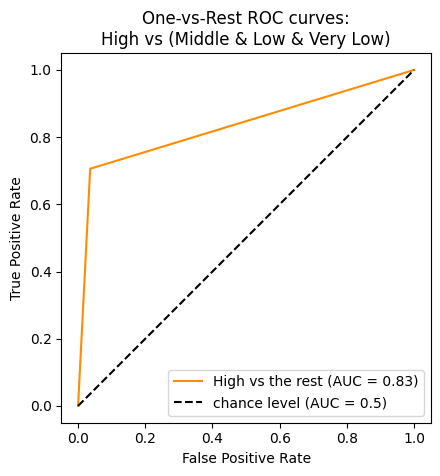

In [14]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(np.where(L_test != 'Middle', 0, 1), np.where(L_pred != 'Middle', 0, 1), name="High vs the rest",
    color="darkorange",)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nHigh vs (Middle & Low & Very Low)")
plt.legend()
plt.show()

In [15]:
def prob_label(R, R_Lp, classes, w, ruler):
    prob = np.zeros((R.shape[0], classes.shape[0]))
    y, n = clf.fuzzify(R, R)
    y_Lp, n_Lp = clf.fuzzify(R_Lp, R)
    
    for i in range(R.shape[0]):
        dists = np.zeros(classes.shape[0])
        for j in range(classes.shape[0]):
            dists[j] = clf.distance_calc(y[i], n[i], y_Lp[j], n_Lp[j], w, ruler)
        prob[i] = np.exp(-dists)/np.exp(-dists).sum(axis = 0)
    
    return prob
prob = prob_label(R_test, R_Lp, classes, w, 'eu')
prob

array([[0.27789428, 0.27453375, 0.24938   , 0.19819197],
       [0.27600226, 0.27536774, 0.2497454 , 0.19888461],
       [0.2179982 , 0.22241639, 0.24785385, 0.31173155],
       [0.21799735, 0.22241664, 0.24785412, 0.31173189],
       [0.21830792, 0.22212495, 0.24827693, 0.3112902 ],
       [0.26885412, 0.27430301, 0.25432126, 0.20252162],
       [0.25203052, 0.25713844, 0.27324223, 0.21758881],
       [0.27565477, 0.2754999 , 0.24986527, 0.19898006],
       [0.21799735, 0.22241664, 0.24785412, 0.31173189],
       [0.28111531, 0.2754192 , 0.24709194, 0.19637356],
       [0.23901126, 0.24120286, 0.26588342, 0.25390245],
       [0.28103559, 0.27553356, 0.24697575, 0.1964551 ],
       [0.220995  , 0.22367756, 0.2458222 , 0.30950524],
       [0.27104675, 0.27428526, 0.25298347, 0.20168453],
       [0.21951015, 0.22340614, 0.24702411, 0.31005961],
       [0.28089725, 0.27567968, 0.24686379, 0.19655928],
       [0.21982077, 0.22401166, 0.24618937, 0.3099782 ],
       [0.27786194, 0.27454604,

In [16]:
from sklearn.preprocessing import LabelBinarizer

encoder = clf.OrderedLabelEncoder()
encoder.fit(classes)
classes_encoded = encoder.transform(classes)
L_test_encoded = encoder.transform(L_test)
L_pred_encoded = encoder.transform(L_pred)
label_binarizer = LabelBinarizer().fit(classes_encoded)
L_onehot_test = label_binarizer.transform(L_test_encoded)
L_onehot_pred = label_binarizer.transform(L_pred_encoded)

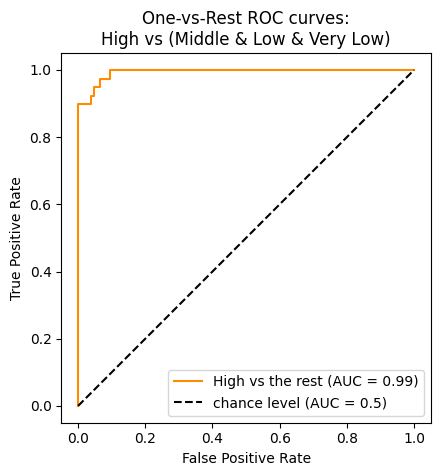

In [17]:
RocCurveDisplay.from_predictions(L_onehot_test[:,3], prob[:,3], name="High vs the rest",
    color="darkorange",)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nHigh vs (Middle & Low & Very Low)")
plt.legend()
plt.show()

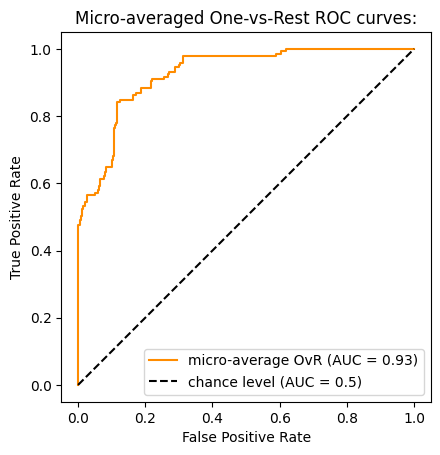

In [18]:
RocCurveDisplay.from_predictions(L_onehot_test.ravel(), prob.ravel(), name="micro-average OvR",
    color="darkorange",)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest ROC curves:")
plt.legend()
plt.show()

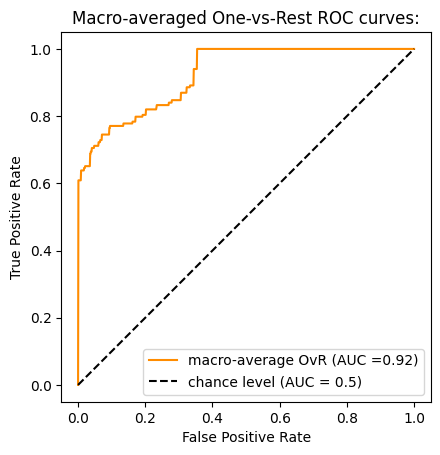

In [19]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(classes.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(L_onehot_test[:, i], prob[:, i])
fpr_grid = np.linspace(0.0, 1.0, 1000)
mean_tpr = np.zeros_like(fpr_grid)
for i in range(classes.shape[0]):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i], left = 0)
mean_tpr /= classes.shape[0]
fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
tpr["macro"][0] = 0
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["macro"], tpr["macro"], color="darkorange", label=f'macro-average OvR (AUC ={np.round(roc_auc["macro"], 2)})')
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-averaged One-vs-Rest ROC curves:")
plt.legend()
plt.show()

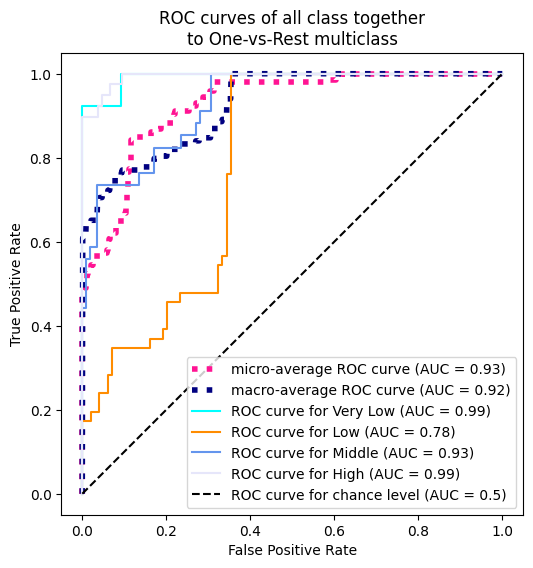

In [20]:
fpr["micro"], tpr["micro"], _ = roc_curve(L_onehot_test.ravel(), prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "lavender"])
for i, color in zip(range(classes.shape[0]), colors):
    RocCurveDisplay.from_predictions(
        L_onehot_test[:, i],
        prob[:, i],
        name=f"ROC curve for {classes[i]}",
        color=color,
        ax=ax,
    )
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves of all class together\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

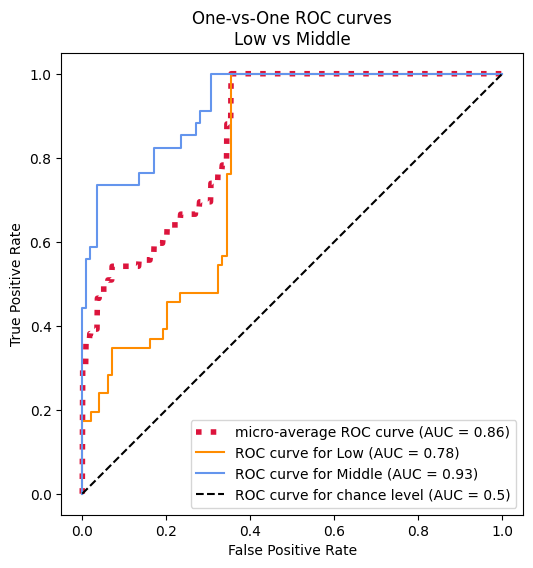

In [21]:
mean_tpr_2 = np.zeros_like(fpr_grid)
for i in range(1, classes.shape[0]-1):
    mean_tpr_2 += np.interp(fpr_grid, fpr[i], tpr[i], left = 0)
mean_tpr_2[0] = 0
mean_tpr_2 /= 2
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(
    fpr_grid,
    mean_tpr_2,
    label=f"micro-average ROC curve (AUC = {auc(fpr_grid, mean_tpr_2):.2f})",
    color="crimson",
    linestyle=":",
    linewidth=4,
)
colors = cycle(["darkorange", "cornflowerblue"])
for i, color in zip(range(1, classes.shape[0]-1), colors):
    RocCurveDisplay.from_predictions(
        L_onehot_test[:, i],
        prob[:, i],
        name=f"ROC curve for {classes[i]}",
        color=color,
        ax=ax,
    )
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-One ROC curves\nLow vs Middle")
plt.legend()
plt.show()

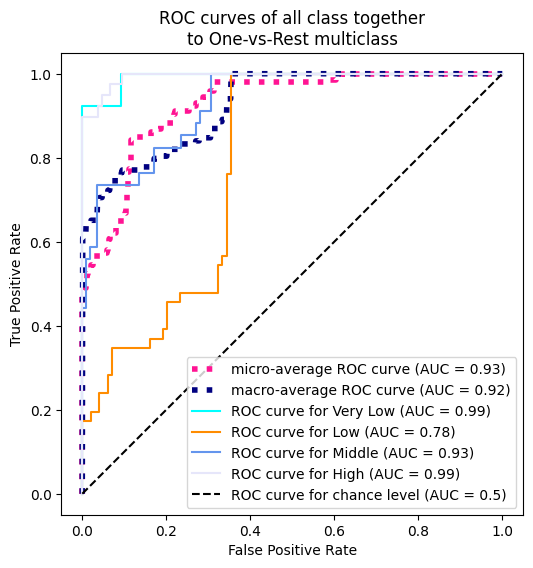

In [22]:
fig = clf.draw_ROC(R_test, R_Lp, classes, w, 'eu', L_test, L_pred)